# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | inari
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | dobrinka
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | boguchany
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | luba
Processing Record 10 of Set 1 | atasu
Processing Record 11 of Set 1 | borba
Processing Record 12 of Set 1 | concordia
Processing Record 13 of Set 1 | dryden
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | mashtul as suq
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | umluj
Processing Record 20 of Set 1 | novo aripuana
Processing Record 21 of Set 1 | mana
Processing Record 22 of Set 1 | kiunga
Processing Record 23 of Set 1 | longmen

Processing Record 37 of Set 4 | tofol
Processing Record 38 of Set 4 | canton
Processing Record 39 of Set 4 | mujiayingzi
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | reyes
Processing Record 42 of Set 4 | gazli
Processing Record 43 of Set 4 | sur
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | kralendijk
Processing Record 46 of Set 4 | santiago de chuco
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | deqen
Processing Record 49 of Set 4 | seven pagodas
Processing Record 0 of Set 5 | linxia chengguanzhen
Processing Record 1 of Set 5 | apolinario saravia
Processing Record 2 of Set 5 | srivardhan
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | aykhal
Processing Record 5 of Set 5 | contamana
Processing Record 6 of Set 5 | samamea
City not found. Skipping...
Processing Record 7 of Set 5 | purranque
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | saynshand
Processing Reco

Processing Record 29 of Set 8 | udgir
Processing Record 30 of Set 8 | acarau
Processing Record 31 of Set 8 | nova olimpia
Processing Record 32 of Set 8 | siwa oasis
Processing Record 33 of Set 8 | ta`u
Processing Record 34 of Set 8 | geraldton
Processing Record 35 of Set 8 | brigantine
Processing Record 36 of Set 8 | pailon
Processing Record 37 of Set 8 | kulia village
City not found. Skipping...
Processing Record 38 of Set 8 | tutoia
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | kone
Processing Record 41 of Set 8 | barcs
Processing Record 42 of Set 8 | tshabong
Processing Record 43 of Set 8 | bubaque
Processing Record 44 of Set 8 | alice springs
Processing Record 45 of Set 8 | la mira
Processing Record 46 of Set 8 | verkhnevilyuysk
Processing Record 47 of Set 8 | juneau
Processing Record 48 of Set 8 | harstad
Processing Record 49 of Set 8 | jiuquan
Processing Record 0 of Set 9 | trabzon
Processing Record 1 of Set 9 | zhaoyuan
Processing Record 2 of Set 9

Processing Record 17 of Set 12 | ugoofaaru
Processing Record 18 of Set 12 | el granada
Processing Record 19 of Set 12 | la jolla
Processing Record 20 of Set 12 | puerto colombia
Processing Record 21 of Set 12 | pandan
Processing Record 22 of Set 12 | altai
Processing Record 23 of Set 12 | beledweyne
Processing Record 24 of Set 12 | pemangkat
Processing Record 25 of Set 12 | saipan
Processing Record 26 of Set 12 | pleasanton
Processing Record 27 of Set 12 | smara
Processing Record 28 of Set 12 | pangody
Processing Record 29 of Set 12 | haiku-pauwela
Processing Record 30 of Set 12 | chipiona
Processing Record 31 of Set 12 | wanning
Processing Record 32 of Set 12 | urengoy
Processing Record 33 of Set 12 | midvagur
Processing Record 34 of Set 12 | phalaborwa
Processing Record 35 of Set 12 | hun
Processing Record 36 of Set 12 | keetmanshoop
Processing Record 37 of Set 12 | hopewell
Processing Record 38 of Set 12 | homer
Processing Record 39 of Set 12 | itacoatiara
Processing Record 40 of Se

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,26.79,77,100,9.64,MH,1707332388
1,inari,68.9060,27.0288,-21.69,100,100,1.11,FI,1707332388
2,iqaluit,63.7506,-68.5145,-20.15,59,75,2.57,CA,1707332388
3,dobrinka,52.1653,40.4731,-0.10,100,100,8.22,RU,1707332388
4,adamstown,-25.0660,-130.1015,24.59,87,100,6.62,PN,1707332388


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,26.79,77,100,9.64,MH,1707332388
1,inari,68.9060,27.0288,-21.69,100,100,1.11,FI,1707332388
2,iqaluit,63.7506,-68.5145,-20.15,59,75,2.57,CA,1707332388
3,dobrinka,52.1653,40.4731,-0.10,100,100,8.22,RU,1707332388
4,adamstown,-25.0660,-130.1015,24.59,87,100,6.62,PN,1707332388


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

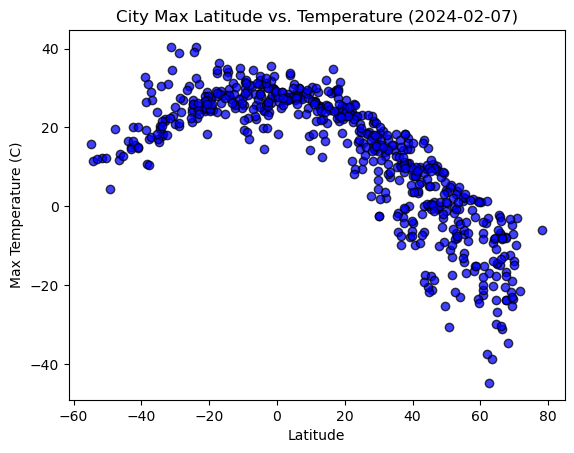

In [26]:
# Build scatter plot for latitude vs. temperature
latitudes_df = city_data_df["Lat"]
max_temps_df = city_data_df["Max Temp"]
latitudeList = [lat for lat in latitudes_df]
maxTempCList = [temp for temp in max_temps_df]
# Incorporate the other graph properties
plt.scatter(latitudeList, maxTempCList, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
plt.title("City Max Latitude vs. Temperature (2024-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

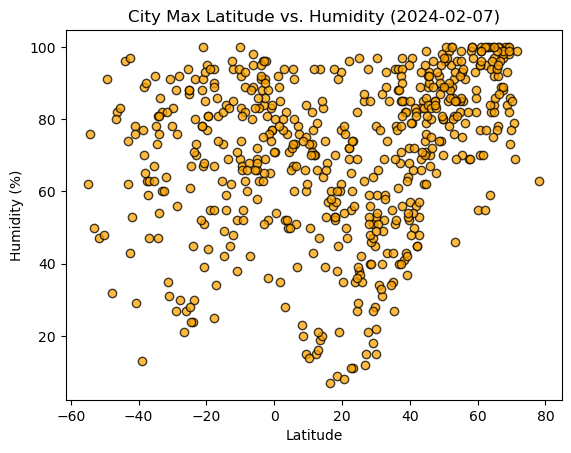

In [27]:
# Build the scatter plots for latitude vs. humidity
humidity_df = city_data_df["Humidity"]
humidityList = [humidity for humidity in humidity_df]

# Incorporate the other graph properties
plt.scatter(latitudeList, humidityList, marker="o", facecolors="orange", edgecolors="black", alpha = 0.75)
plt.title("City Max Latitude vs. Humidity (2024-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

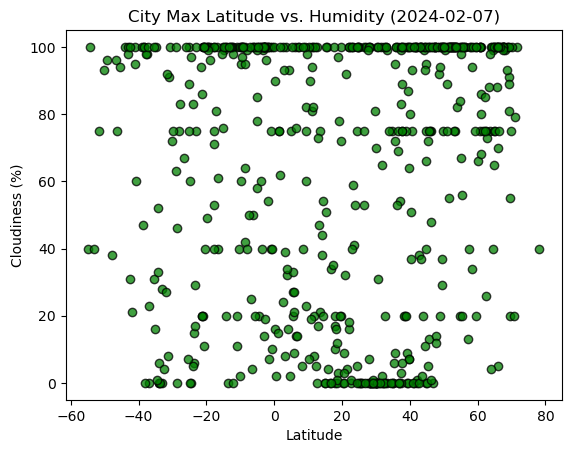

In [28]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_df = city_data_df["Cloudiness"]
cloudinessList = [cloudiness for cloudiness in cloudiness_df]

# Incorporate the other graph properties
plt.scatter(latitudeList, cloudinessList, marker="o", facecolors="green", edgecolors="black", alpha = 0.75)
plt.title("City Max Latitude vs. Humidity (2024-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

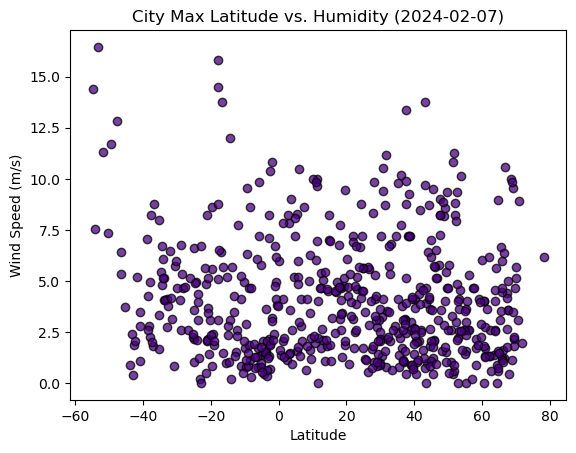

In [29]:
# Build the scatter plots for latitude vs. wind speed
wind_speed_df = city_data_df["Wind Speed"]
windSpeedList = [windSpeed for windSpeed in wind_speed_df]

# Incorporate the other graph properties
plt.scatter(latitudeList, windSpeedList, marker="o", facecolors="indigo", edgecolors="black", alpha = 0.75)
plt.title("City Max Latitude vs. Humidity (2024-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
# Code in this section deferred to cells below
(slope, intercept, LTrvalue, pvalue, stderr) = linregress(latitudes_df, max_temps_df)
LatTempRegressValues = latitudes_df * slope + intercept

LatTempLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

(slope, intercept, LHrvalue, pvalue, stderr) = linregress(latitudes_df, humidity_df)
LatHumidityRegressValues = latitudes_df * slope + intercept

LatHumidityLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

(slope, intercept, LCrvalue, pvalue, stderr) = linregress(latitudes_df, cloudiness_df)
LatCloudinessRegressValues = latitudes_df * slope + intercept

LatCloudinessLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

(slope, intercept, LWrvalue, pvalue, stderr) = linregress(latitudes_df, wind_speed_df)
LatWindSpeedRegressValues = latitudes_df * slope + intercept

LatWindSpeedLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,26.79,77,100,9.64,MH,1707332388
1,inari,68.9060,27.0288,-21.69,100,100,1.11,FI,1707332388
2,iqaluit,63.7506,-68.5145,-20.15,59,75,2.57,CA,1707332388
3,dobrinka,52.1653,40.4731,-0.10,100,100,8.22,RU,1707332388
5,albany,42.6001,-73.9662,6.24,53,38,1.60,US,1707332145


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,24.59,87,100,6.62,PN,1707332388
10,borba,-4.3878,-59.5939,31.14,63,100,0.42,BR,1707332388
11,concordia,-31.3930,-58.0209,40.44,35,8,3.13,AR,1707332389
16,chonchi,-42.6128,-73.8092,20.07,43,31,1.87,CL,1707332389
19,novo aripuana,-5.1206,-60.3797,31.92,58,100,1.35,BR,1707332389


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8707348580773213


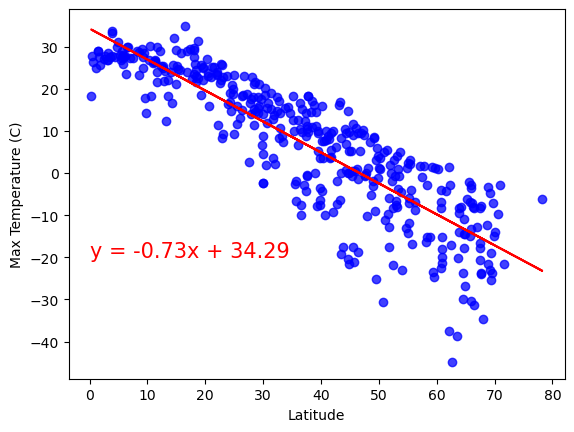

In [54]:
# Linear regression on Northern Hemisphere
northern_latitudes_df = northern_hemi_df["Lat"]
northern_max_temps_df = northern_hemi_df["Max Temp"]
northernLatitudeList = [lat for lat in northern_latitudes_df]
northernMaxTempCList = [temp for temp in northern_max_temps_df]

(slope, intercept, NLTrvalue, pvalue, stderr) = linregress(northern_latitudes_df, northern_max_temps_df)
NLTRegressValues = northern_latitudes_df * slope + intercept

LatTempLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(northernLatitudeList, northernMaxTempCList, marker="o", facecolors="blue", alpha = 0.75)
plt.plot(northernLatitudeList,NLTRegressValues,"r-")
plt.annotate(LatTempLineEq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r-value is: {NLTrvalue}")
plt.show()

The r-value is: 0.5668647438927744


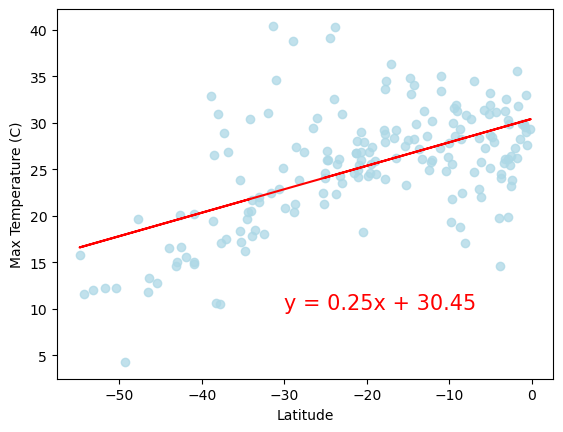

In [59]:
# Linear regression on Southern Hemisphere
southern_latitudes_df = southern_hemi_df["Lat"]
southern_max_temps_df = southern_hemi_df["Max Temp"]
southernLatitudeList = [lat for lat in southern_latitudes_df]
southernMaxTempCList = [temp for temp in southern_max_temps_df]

(slope, intercept, SLTrvalue, pvalue, stderr) = linregress(southern_latitudes_df, southern_max_temps_df)
SLTRegressValues = southern_latitudes_df * slope + intercept

LatTempLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(southernLatitudeList, southernMaxTempCList, marker="o", facecolors="lightblue", alpha = 0.75)
plt.plot(southernLatitudeList,SLTRegressValues,"r-")
plt.annotate(LatTempLineEq,(-30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r-value is: {SLTrvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.49299402396692726


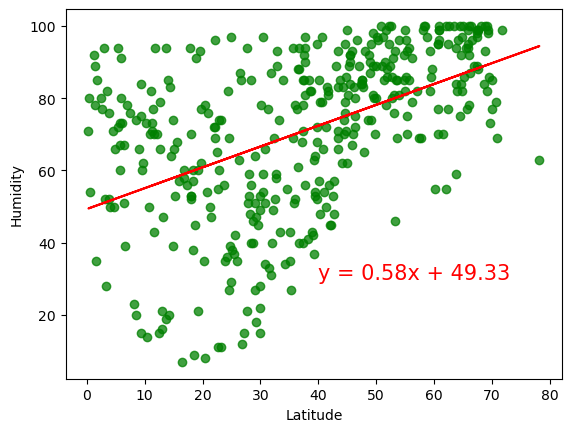

In [62]:
# Northern Hemisphere
northern_humidity_df = northern_hemi_df["Humidity"]
northernHumidityList = [humidity for humidity in northern_humidity_df]

(slope, intercept, NLHrvalue, pvalue, stderr) = linregress(northern_latitudes_df, northern_humidity_df)
NLHRegressValues = northern_latitudes_df * slope + intercept

LatHumLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(northernLatitudeList, northernHumidityList, marker="o", facecolors="green", alpha = 0.75)
plt.plot(northernLatitudeList,NLHRegressValues,"r-")
plt.annotate(LatHumLineEq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {NLHrvalue}")
plt.show()

The r-value is: 0.19855354027136005


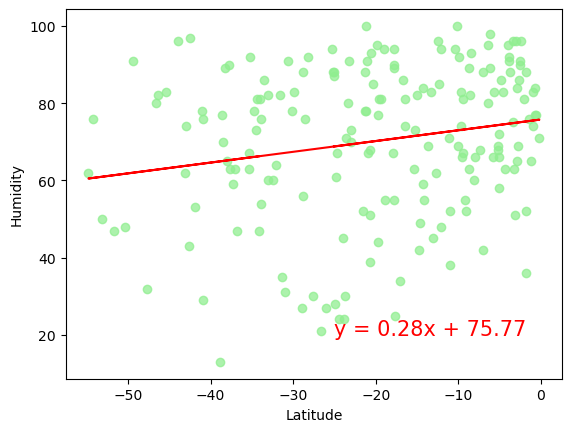

In [65]:
# Southern Hemisphere
southern_humidity_df = southern_hemi_df["Humidity"]
southernHumidityList = [humidity for humidity in southern_humidity_df]

(slope, intercept, SLHrvalue, pvalue, stderr) = linregress(southern_latitudes_df, southern_humidity_df)
SLHRegressValues = southern_latitudes_df * slope + intercept

LatHumLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(southernLatitudeList, southernHumidityList, marker="o", facecolors="lightgreen", alpha = 0.75)
plt.plot(southernLatitudeList,SLHRegressValues,"r-")
plt.annotate(LatHumLineEq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {SLHrvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3425737904941669


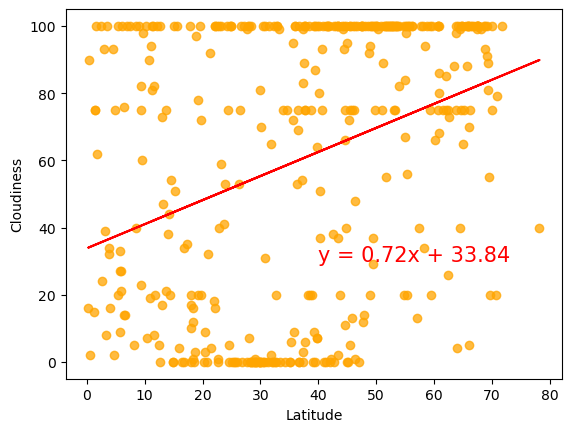

In [68]:
# Northern Hemisphere
northern_cloudiness_df = northern_hemi_df["Cloudiness"]
northernCloudinessList = [cloudiness for cloudiness in northern_cloudiness_df]

(slope, intercept, NLCrvalue, pvalue, stderr) = linregress(northern_latitudes_df, northern_cloudiness_df)
NLCRegressValues = northern_latitudes_df * slope + intercept

LatCloudLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(northernLatitudeList, northernCloudinessList, marker="o", facecolors="orange", alpha = 0.75)
plt.plot(northernLatitudeList,NLCRegressValues,"r-")
plt.annotate(LatCloudLineEq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {NLCrvalue}")
plt.show()

The r-value is: 0.14196480253836577


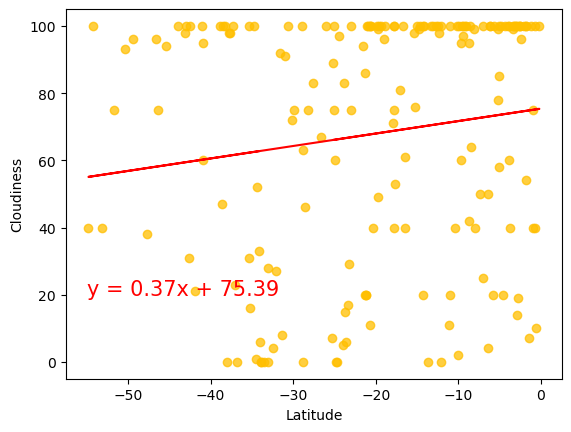

In [93]:
# Southern Hemisphere
southern_cloudiness_df = southern_hemi_df["Cloudiness"]
southernCloudinessList = [cloudiness for cloudiness in southern_cloudiness_df]

(slope, intercept, SLCrvalue, pvalue, stderr) = linregress(southern_latitudes_df, southern_cloudiness_df)
SLCRegressValues = southern_latitudes_df * slope + intercept

LatCloudLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(southernLatitudeList, southernCloudinessList, marker="o", facecolors='#ffbf00', alpha = 0.75)
plt.plot(southernLatitudeList,SLCRegressValues,"r-")
plt.annotate(LatCloudLineEq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {SLCrvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07723852910740886


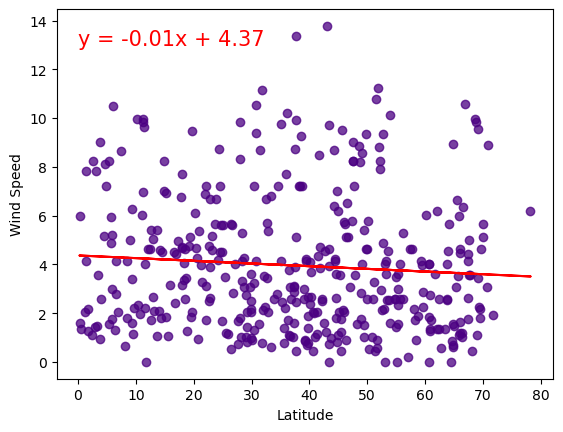

In [94]:
# Northern Hemisphere
northern_wind_speed_df = northern_hemi_df["Wind Speed"]
northernWindSpeedList = [windspeed for windspeed in northern_wind_speed_df]

(slope, intercept, NLWrvalue, pvalue, stderr) = linregress(northern_latitudes_df, northern_wind_speed_df)
NLWRegressValues = northern_latitudes_df * slope + intercept

LatWindLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(northernLatitudeList, northernWindSpeedList, marker="o", facecolors="indigo", alpha = 0.75)
plt.plot(northernLatitudeList,NLWRegressValues,"r-")
plt.annotate(LatWindLineEq,(0,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {NLWrvalue}")
plt.show()

The r-value is: -0.2694724643602254


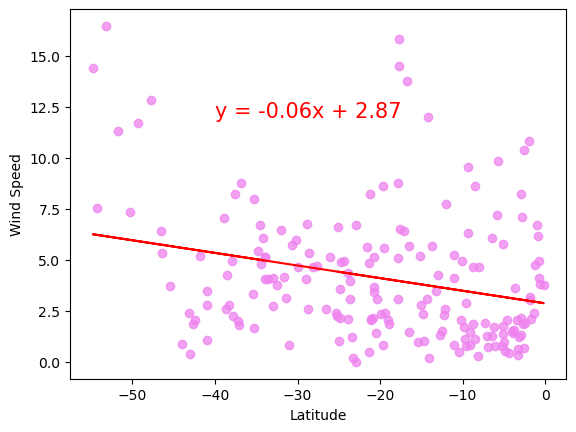

In [100]:
# Southern Hemisphere
southern_wind_speed_df = southern_hemi_df["Wind Speed"]
southernWindSpeedList = [windspeed for windspeed in southern_wind_speed_df]

(slope, intercept, SLWrvalue, pvalue, stderr) = linregress(southern_latitudes_df, southern_wind_speed_df)
SLWRegressValues = southern_latitudes_df * slope + intercept

LatWindLineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(southernLatitudeList, southernWindSpeedList, marker="o", facecolors="violet", alpha = 0.75)
plt.plot(southernLatitudeList,SLWRegressValues,"r-")
plt.annotate(LatWindLineEq,(-40,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {SLWrvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE